In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [86]:
df=pd.read_csv("Country-data.csv")

In [87]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [88]:
df.shape[0]

167

167 countries

Text(0, 0.5, 'child_mortality_per_1000_child')

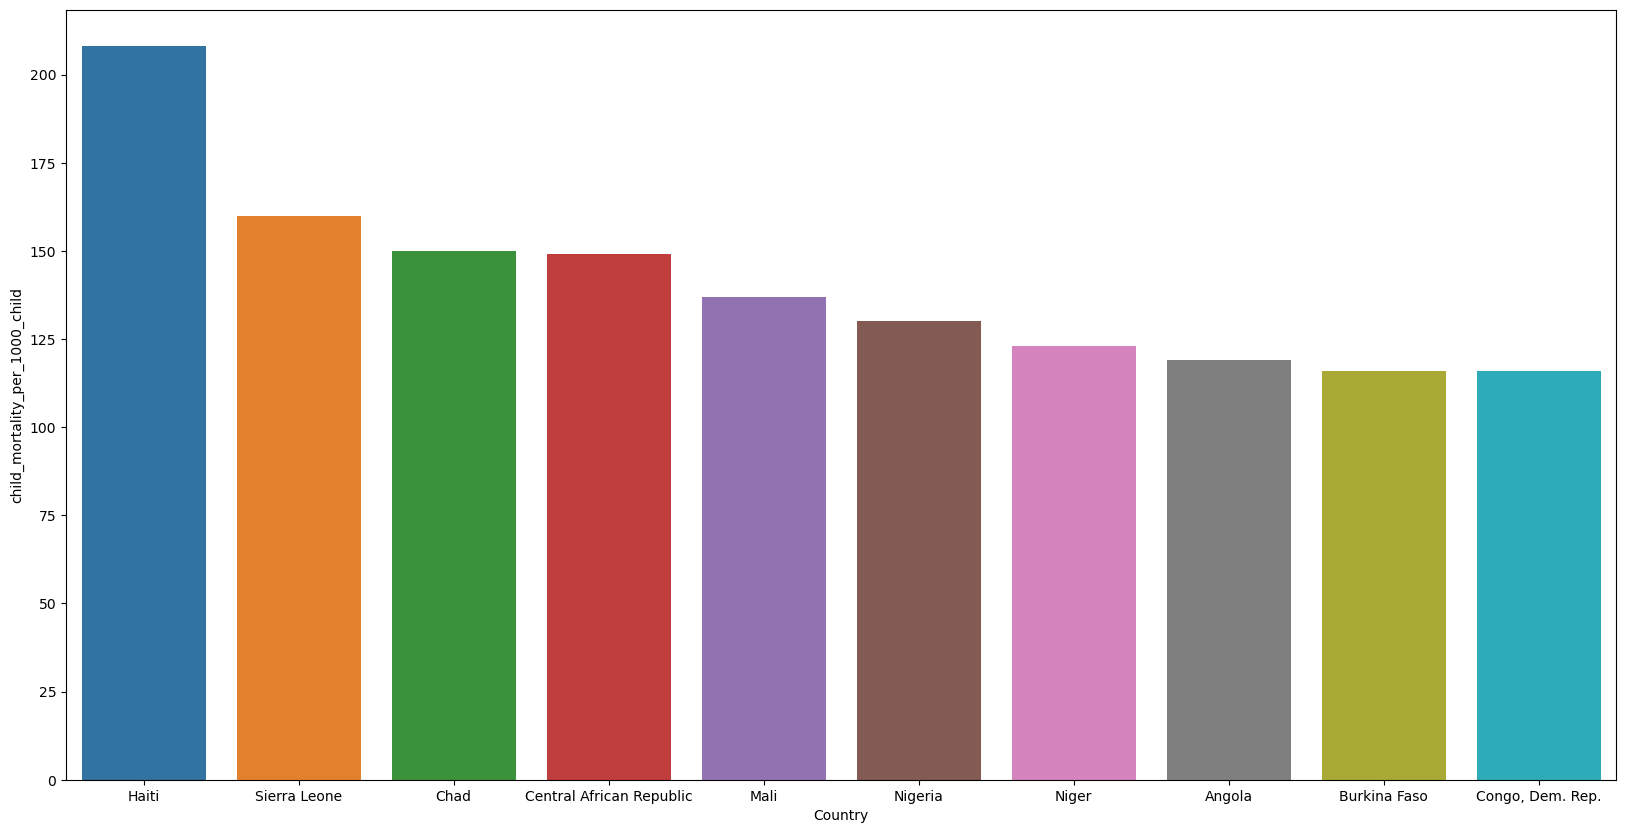

In [89]:
plt.figure(figsize=(20,10))
sns.barplot(x="country",y="child_mort",data=df.sort_values("child_mort",ascending=False).head(10))
plt.xlabel("Country")
plt.ylabel("child_mortality_per_1000_child")

Text(0, 0.5, 'exports')

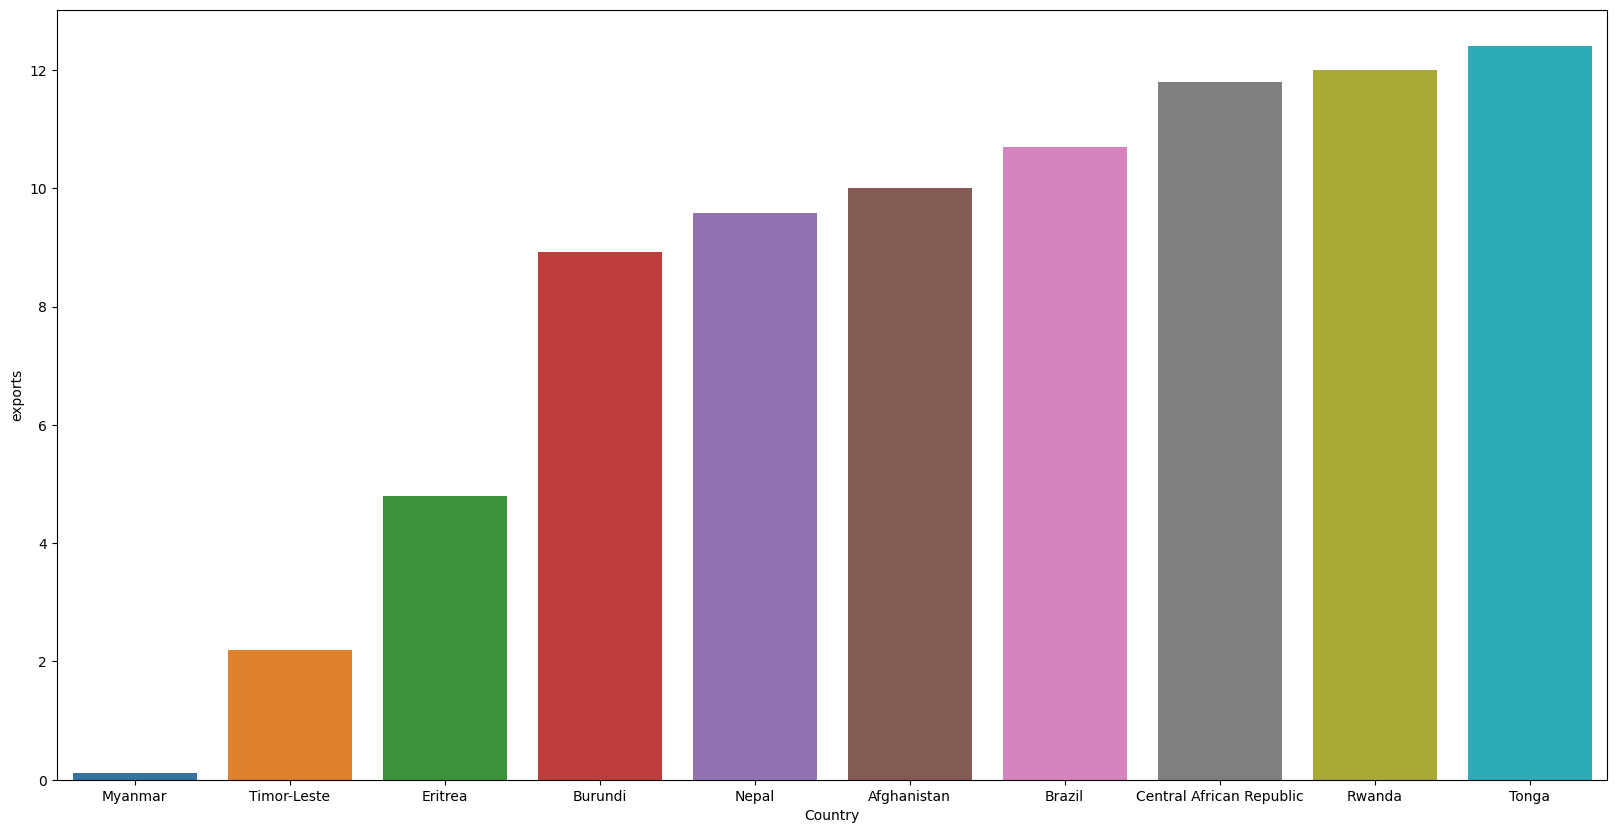

In [90]:
plt.figure(figsize=(20,10))
sns.barplot(x="country",y="exports",data=df.sort_values("exports").head(10))
plt.xlabel("Country")
plt.ylabel("exports")

Text(0, 0.5, 'health')

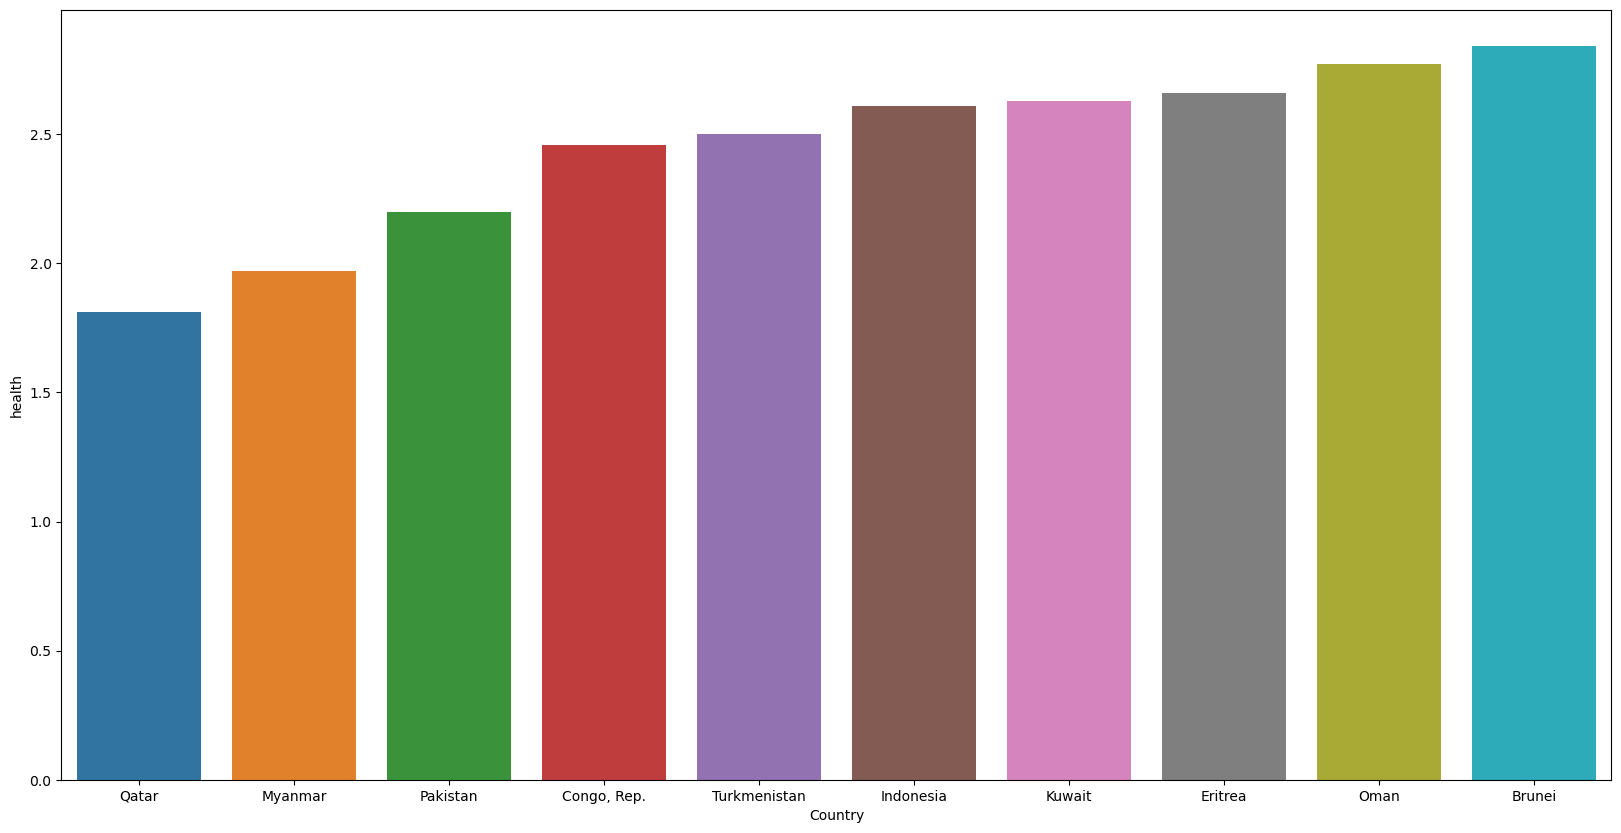

In [91]:
plt.figure(figsize=(20,10))
sns.barplot(x="country",y="health",data=df.sort_values("health").head(10))
plt.xlabel("Country")
plt.ylabel("health")

Text(0, 0.5, 'imports')

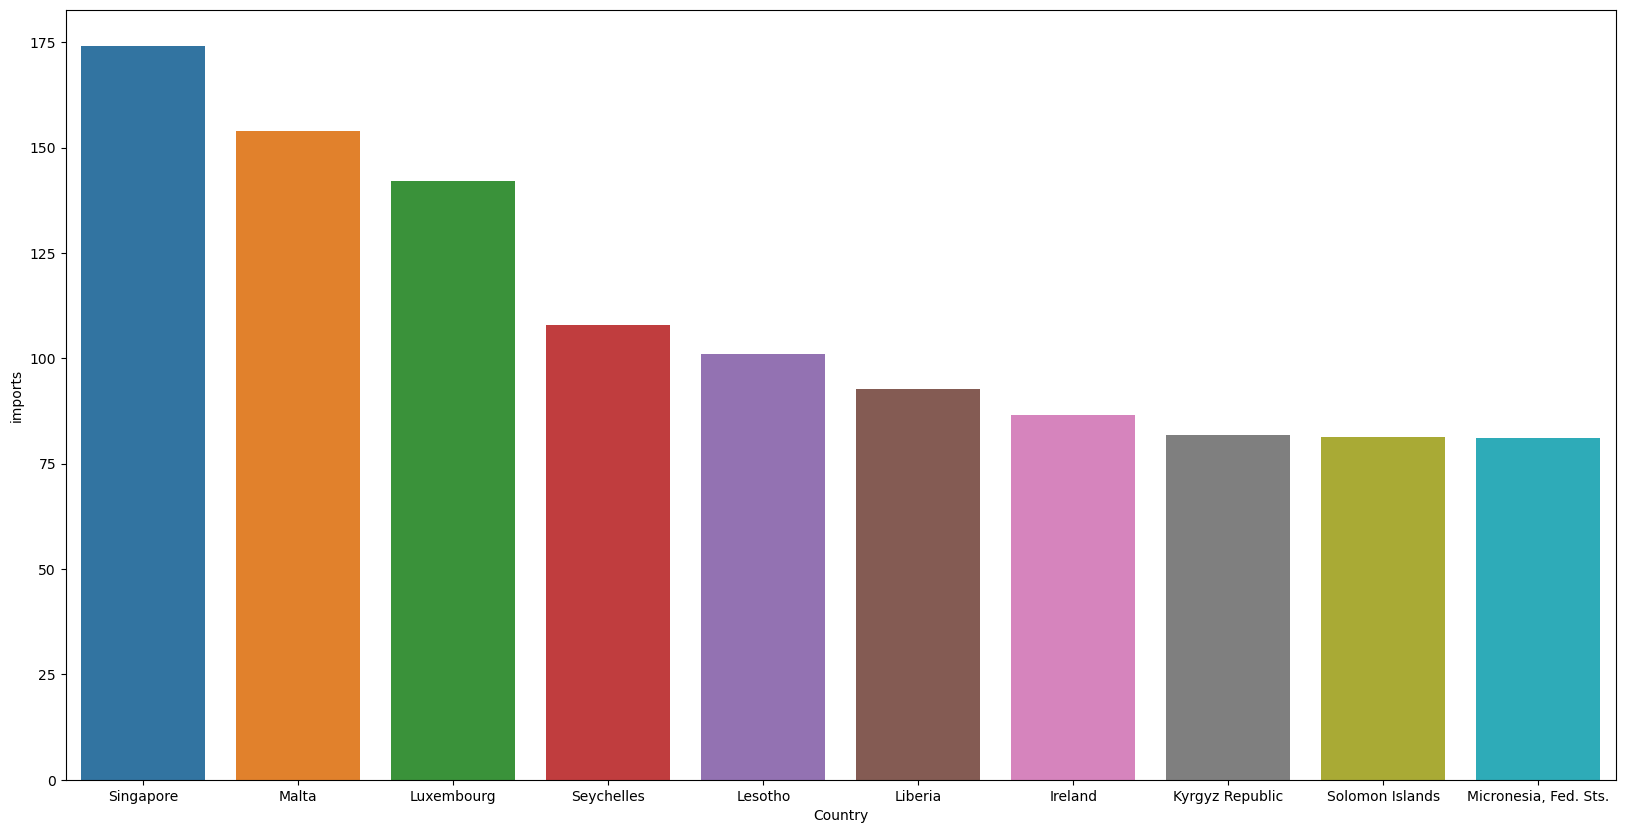

In [92]:
plt.figure(figsize=(20,10))
sns.barplot(x="country",y="imports",data=df.sort_values("imports",ascending=False).head(10))
plt.xlabel("Country")
plt.ylabel("imports")

Text(0, 0.5, 'income')

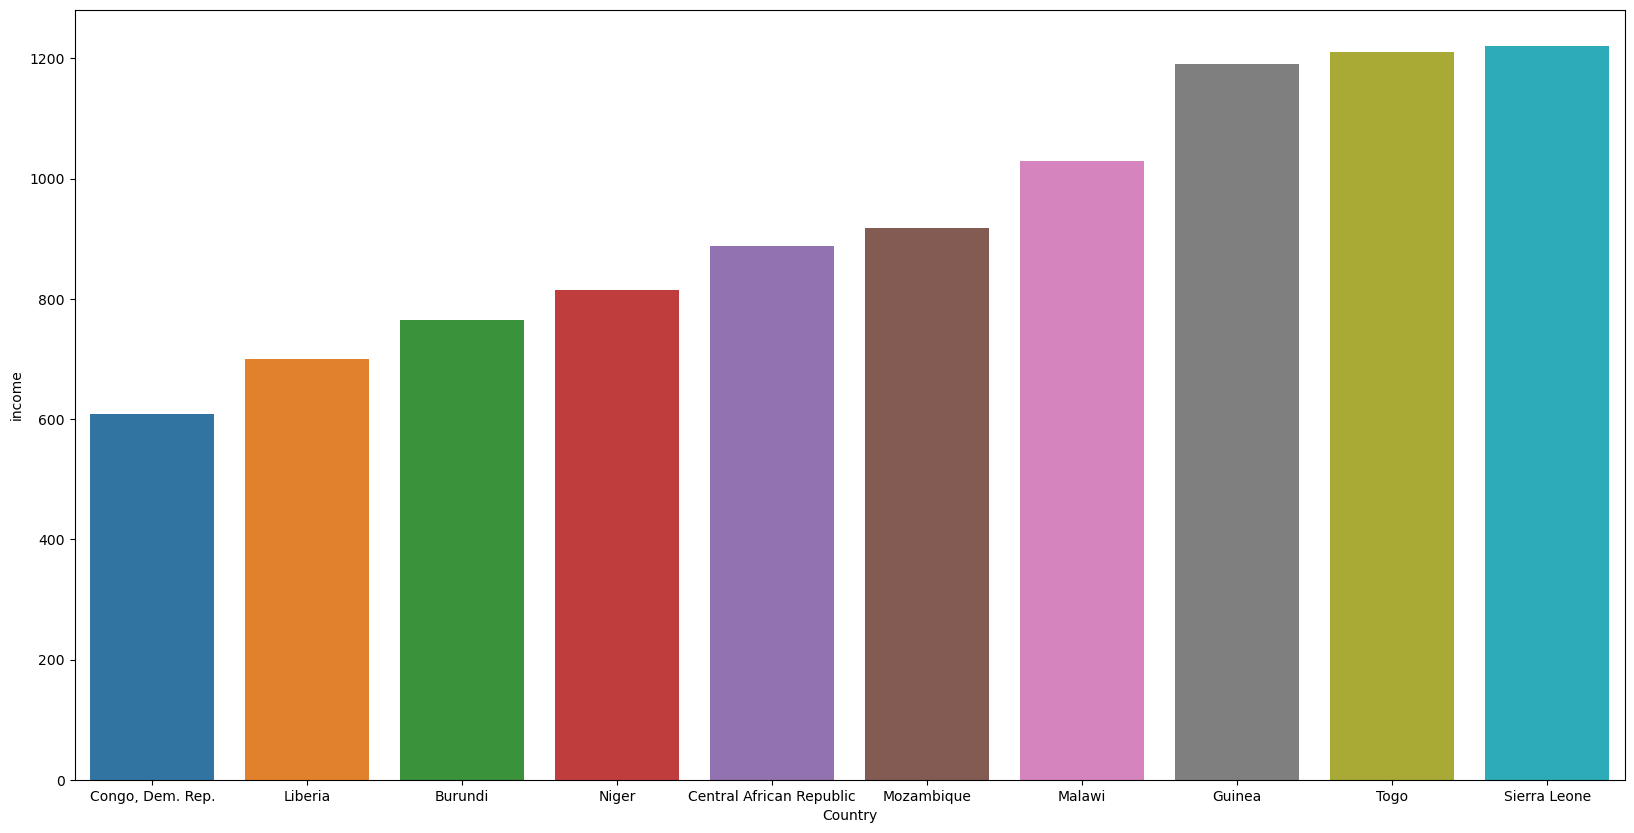

In [93]:
plt.figure(figsize=(20,10))
sns.barplot(x="country",y="income",data=df.sort_values("income",).head(10))
plt.xlabel("Country")
plt.ylabel("income")

Text(0, 0.5, 'gdpp')

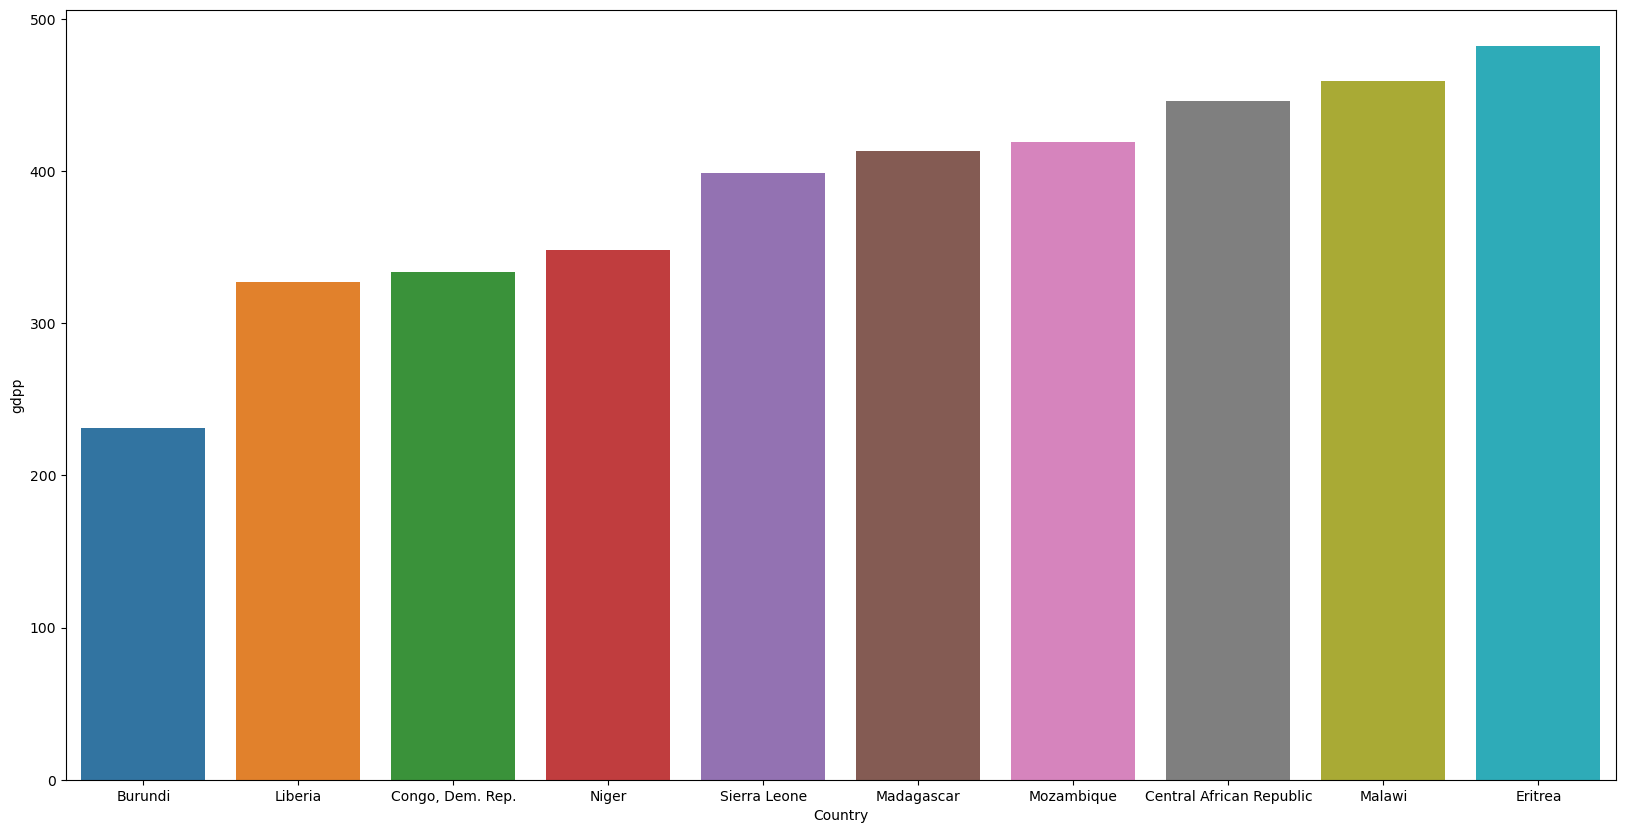

In [94]:
plt.figure(figsize=(20,10))
sns.barplot(x="country",y="gdpp",data=df.sort_values("gdpp",).head(10))
plt.xlabel("Country")
plt.ylabel("gdpp")

In [95]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [97]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [98]:
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [99]:
df_temp=df.drop("country",axis=1)

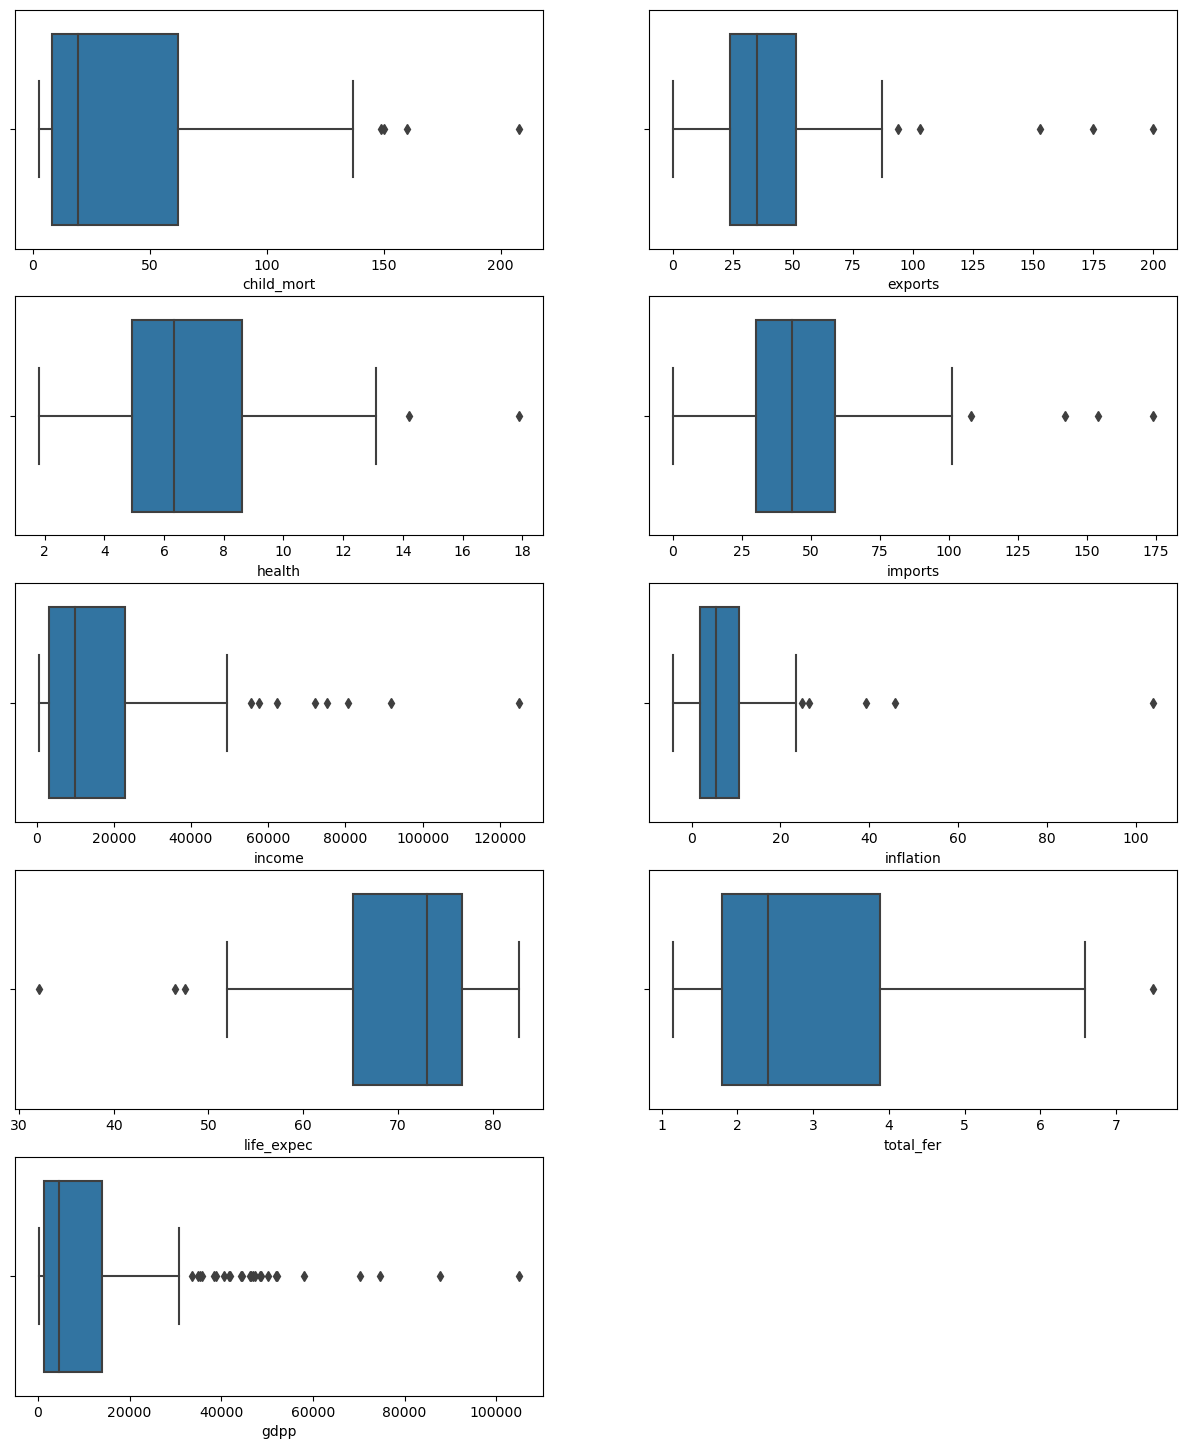

In [100]:
plt.figure(figsize=(15,18))
count=1;
for column in df_temp.columns:
    plt.subplot(5,2,count)
    count+=1
    sns.boxplot(x=column,data=df_temp)

we can see there is some outliers and we will handle it in pca

<Axes: >

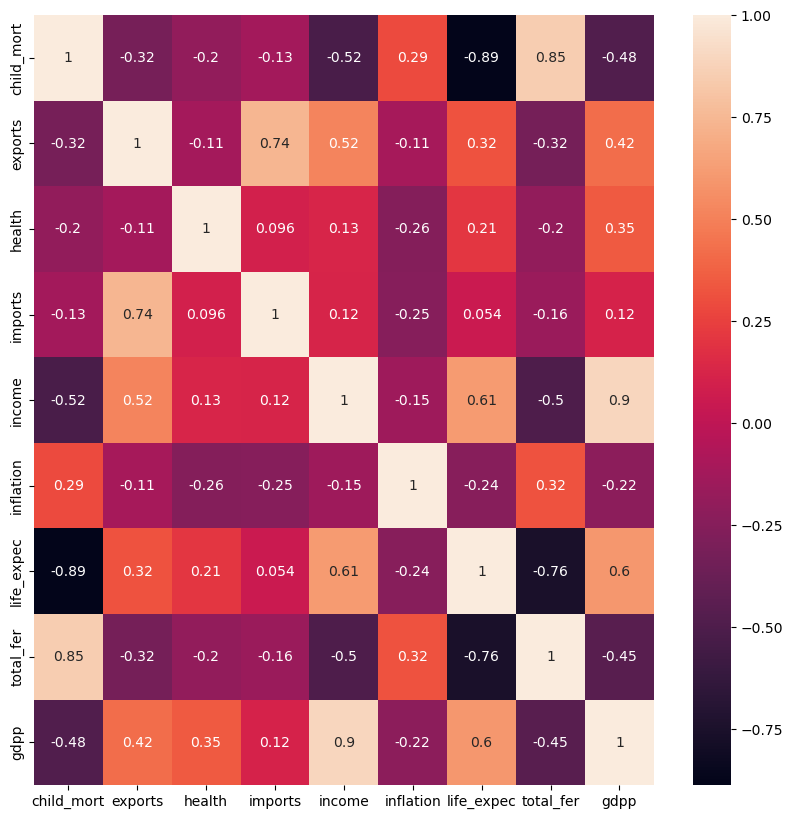

In [101]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(numeric_only=True),annot=True)

from above heatmap, we can see exports is highly correlated with import. health, exports, income,imports are highly correlated with gdpp. So, it will be treated after performing PCA.

### Data Preparation

#### Performing PCA on the data ( Principal Component Analysis)

In [102]:
## First let us see if we can explain the dataset using fewer variables
from sklearn.preprocessing import StandardScaler
Country_data=df.drop('country',axis=1) ## Droping string feature country name.
standard_scaler = StandardScaler()
Country_scaled = standard_scaler.fit_transform(Country_data)

Perfoming PCA

In [103]:
from sklearn.decomposition import PCA

In [104]:
pca = PCA(svd_solver='randomized', random_state=42,)


# fiting PCA on the dataset
pca.fit(Country_scaled)

PCA(random_state=42, svd_solver='randomized')

In [105]:
pca.components_

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ],
       [-0.02954353,  0.14476069, -0.59663237, -0.29992674,  0.3015475 ,
         0.64251951,  0.11391854,  0.01954925,  0.12297749],
       [ 0.37065326,  0.00309102,  0.4618975 , -0.07190746,  0.39215904,
         0.15044176, -0.20379723,  0.37830365,  0.53199457],
       [-0.16896968,  0.05761584,  0.51800037,  0.25537642, -0.2471496 ,
         0.7148691 ,  0.1082198 , -0.13526221, -0.18016662],
       [ 0.20062815, -0.05933283,  0.00727646, -0.03003154,  0.16034699,
         0.06628537, -0.60112652, -0.75068875,  0.01677876],
       [-0.07948854, -0.70730269, -0.24983051,  0.59218953,  0.09556237,
         0.10463252,  0.01848639,  0.02882643,  0.24299776],
       [-0.68274306, -0.01419742,  0.07249683, -0.02894642,  0

Let's check the variance ratios of each features

In [106]:
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

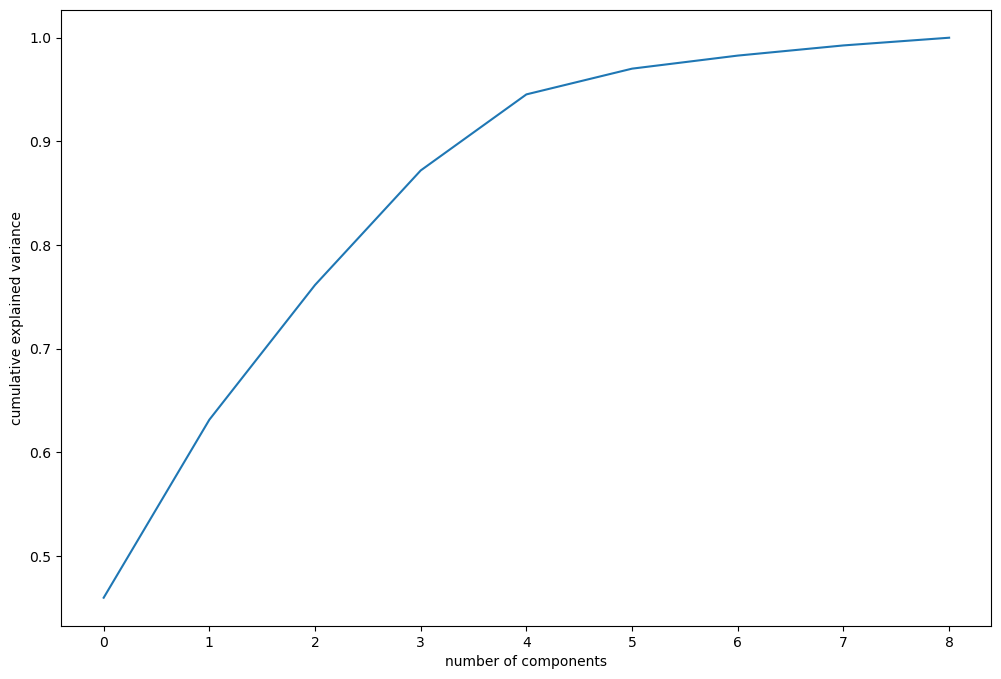

In [107]:
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

From above scree plot, Around 98% of the information is being explained by 5 components.
- Understanding how the original 9 variables are loaded on the principal components. It can be verified from above as well.

In [108]:
colnames=list(df_temp.columns)

In [109]:
pcs_df=pd.DataFrame({'Feature':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],'PC4':pca.components_[3],'PC5':pca.components_[4]})

In [110]:
pcs_df.head()

,Feature,PC1,PC2,PC3,PC4,PC5
0,child_mort,-0.419519,0.192884,-0.029544,0.370653,-0.168970
1,exports,0.283897,0.613163,0.144761,0.003091,0.057616
2,health,0.150838,-0.243087,-0.596632,0.461897,0.518000
3,imports,0.161482,0.671821,-0.299927,-0.071907,0.255376
4,income,0.398441,0.022536,0.301548,0.392159,-0.247150


Performing Incremental PCA

In [1]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=5)

In [112]:
df_pca = pca_final.fit_transform(df_temp)
df_pca.shape
df_pca

array([[-1.98151280e+04,  1.65112472e+03,  3.84251997e+01,
        -1.86982174e-01, -1.36938641e+01],
       [-1.13389390e+04, -1.49346903e+03, -2.81815475e+01,
        -1.40682787e+01, -7.98547682e+00],
       [-8.92635259e+03, -3.26468410e+03, -1.19179872e+01,
        -1.68033362e+01,  1.22214407e+01],
       [-1.46524659e+04,  8.67795270e+02,  5.95566082e+01,
         4.04877651e+01,  2.44182915e+01],
       [ 8.96142032e+02, -1.89847815e+03, -2.91327240e+01,
         5.07326141e-01, -7.64147634e+00],
       [-6.99699306e+02, -3.00451171e+03, -7.60450983e+00,
        -4.52305537e+01,  9.65474037e+00],
       [-1.42839444e+04,  9.29672241e+01, -2.74646558e+01,
        -1.92279704e+01, -6.90693417e+00],
       [ 4.43727025e+04,  1.16354527e+04,  1.07929593e+01,
        -4.37208948e+01, -3.06244287e+00],
       [ 4.22463421e+04,  6.76525844e+03, -1.69472480e+00,
        -6.95395989e+00, -2.04743998e+00],
       [-5.72551309e+03, -4.39118182e+03,  2.76133448e+00,
        -1.01550771e+01

Creating a transpose so that the each column is properly arranged

In [113]:
pc = np.transpose(df_pca)

In [114]:
pc

array([[-1.98151280e+04, -1.13389390e+04, -8.92635259e+03,
        -1.46524659e+04,  8.96142032e+02, -6.99699306e+02,
        -1.42839444e+04,  4.43727025e+04,  4.22463421e+04,
        -5.72551309e+03,  1.45108648e+04,  2.27232733e+04,
        -1.90710762e+04,  7.44735254e+02, -5.44962091e+03,
         3.90029276e+04, -1.26570298e+04, -1.95217046e+04,
        -1.52018204e+04, -1.60732239e+04, -1.11343558e+04,
        -7.33742276e+03, -3.13382968e+03,  6.14585742e+04,
        -5.54730448e+03, -1.99308479e+04, -2.06511429e+04,
        -1.89936758e+04, -1.85320664e+04,  4.07729133e+04,
        -1.48543911e+04, -2.04133880e+04, -1.93463083e+04,
         1.59499352e+03, -1.13067962e+04, -9.15029156e+03,
        -1.98120978e+04, -2.06930387e+04, -1.57110532e+04,
        -6.28464073e+03, -1.85720720e+04,  2.51586246e+03,
         2.44284312e+04,  1.28027054e+04,  5.04523815e+04,
        -9.55447409e+03, -1.13689253e+04, -1.24133172e+04,
        -1.40058814e+04,  1.48724121e+04, -2.00019561e+0

Creating correlation matrix for the principal components


In [115]:
corrmat = np.corrcoef(pc)

Plotting the correlation matrix of the principal components

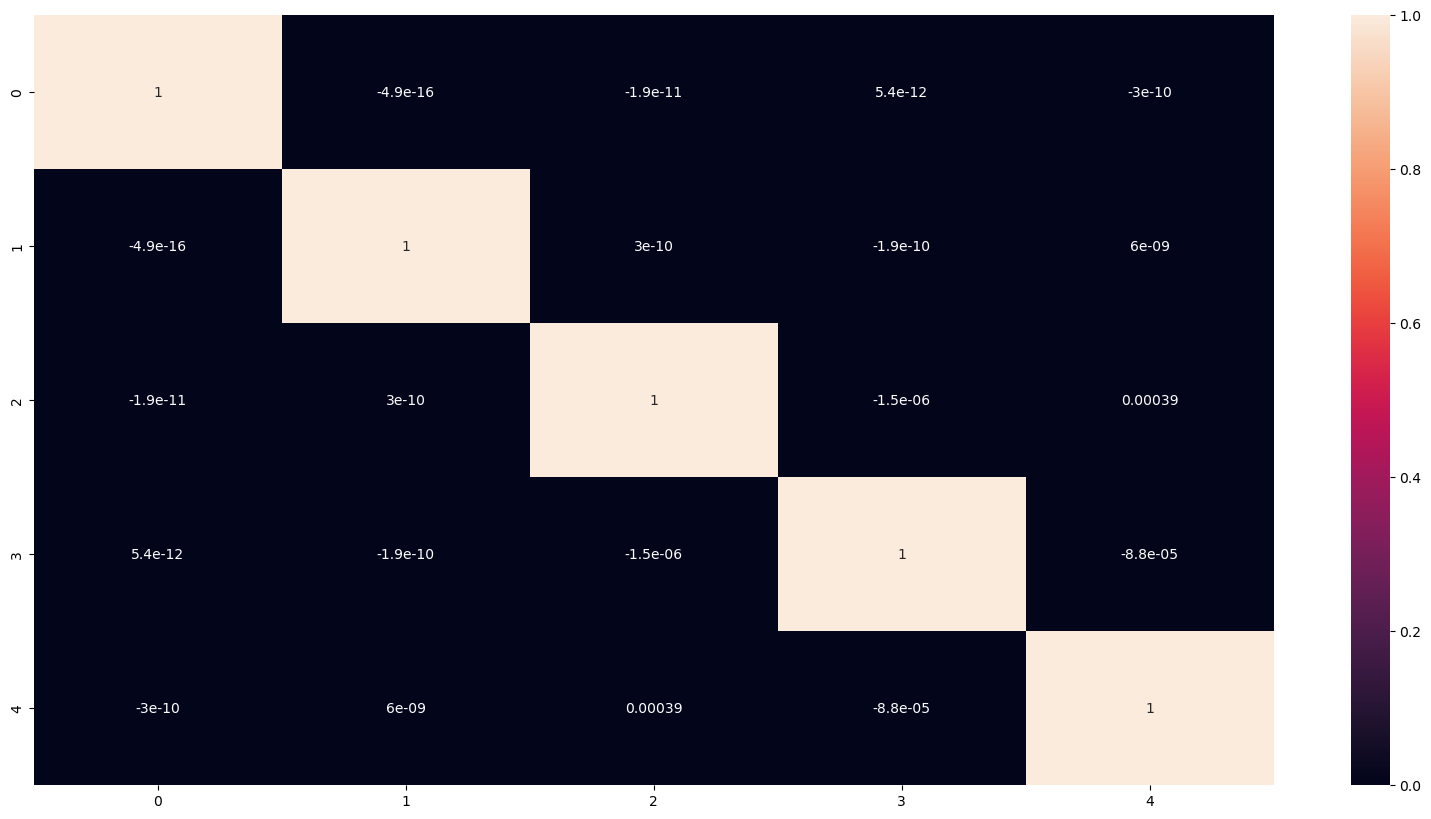

In [116]:
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)
plt.show()

- From above heat map, we can see all the compnents are not correlated to each other.

Creating the dataframe of all 5 principal components

In [117]:
pcs_df2 = pd.DataFrame({'PC1':pc[0],'PC2':pc[1],'PC3':pc[2],'PC4':pc[3],'PC5':pc[4]})

Checking outliers of all the principal complnents

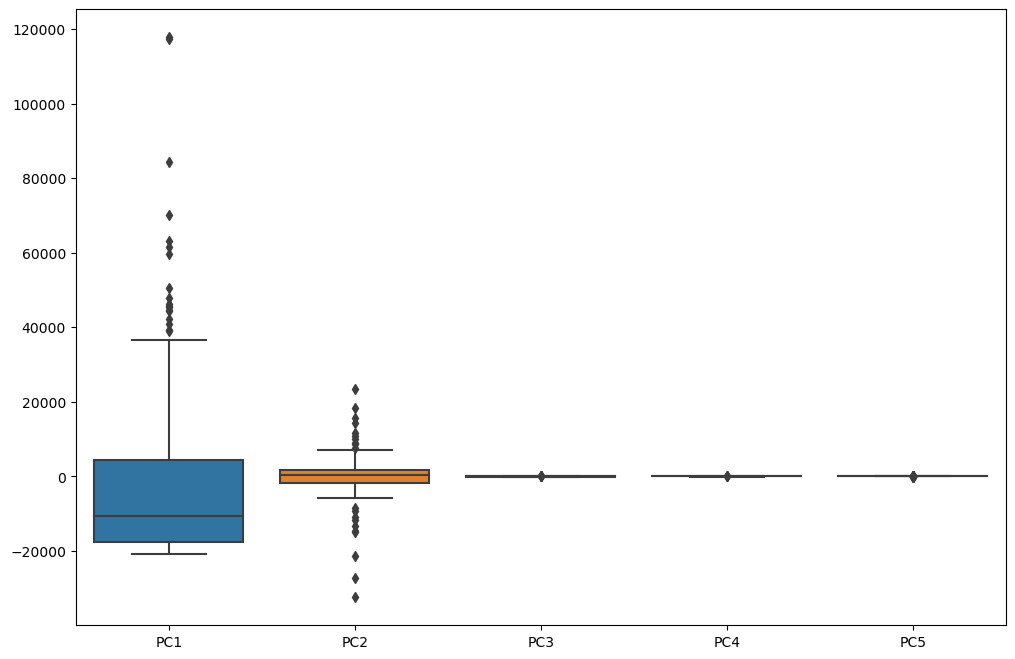

In [118]:
fig = plt.figure(figsize = (12,8))
sns.boxplot(data=pcs_df2)
plt.show()

From above boxplots, we can see the Outliers in the data, So we will do the outlier treatment below

In [119]:
pcs_df2

,PC1,PC2,PC3,PC4,PC5
0,-19815.128018,1651.124720,38.425200,-0.186982,-13.693864
1,-11338.938992,-1493.469028,-28.181547,-14.068279,-7.985477
2,-8926.352589,-3264.684102,-11.917987,-16.803336,12.221441
3,-14652.465937,867.795270,59.556608,40.487765,24.418291
4,896.142032,-1898.478151,-29.132724,0.507326,-7.641476
...,...,...,...,...,...
162,-17180.967679,2487.153835,-28.119900,8.625410,3.423329
163,-100.445973,832.252802,-7.720616,-35.809271,31.438935
164,-17202.017189,222.889872,-45.252040,39.919759,8.154275
165,-17209.340213,229.815901,7.954802,-7.513118,12.604809


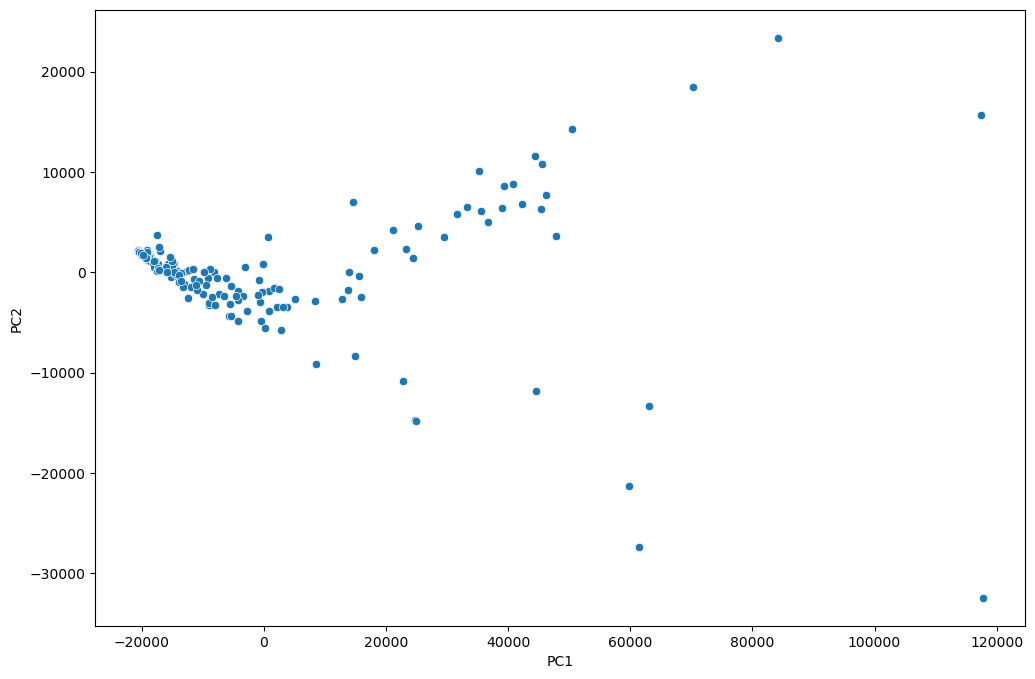

In [120]:
#Visualising the points on the PCs.
# one of the prime advatanges of PCA is that you can visualise high dimensional data
fig = plt.figure(figsize = (12,8))
sns.scatterplot(x='PC1',y='PC2',data=pcs_df2)
plt.show()

#####  Clustering Process

Performing k-Means Clustering

First we'll do the silhouette score analysis

In [121]:
data3_1=pcs_df2

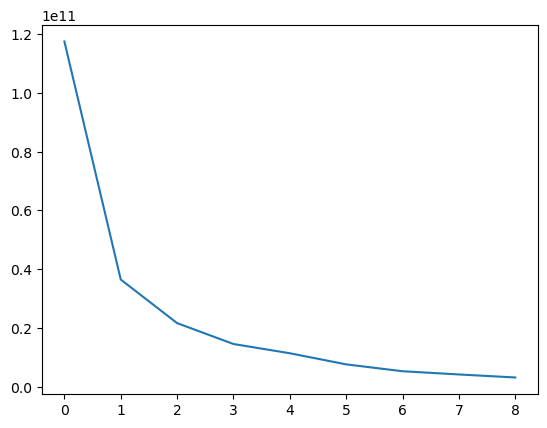

In [122]:
ssd = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(data3_1)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)
plt.show()

2 clusters are good by elbow method

In [123]:
from sklearn.cluster  import KMeans
from sklearn.metrics import silhouette_score
sse_=[]
for k in range(2,11):
    kmeans = KMeans(n_clusters=k).fit(data3_1);
    sse_.append([k, silhouette_score(data3_1, kmeans.labels_)])

In [124]:
sse_

[[2, 0.7256319832557214],
 [3, 0.7003514885570102],
 [4, 0.6109311446827703],
 [5, 0.5734804404975653],
 [6, 0.5923353079940696],
 [7, 0.5944284764823539],
 [8, 0.597014495607045],
 [9, 0.5537882139668351],
 [10, 0.5622496391008535]]

As per elbow curve, Let's perform K means using K=3

In [125]:
model_clus2 = KMeans(n_clusters = 3, max_iter=50,random_state = 50)
model_clus2.fit(data3_1)

KMeans(max_iter=50, n_clusters=3, random_state=50)

In [126]:
dat4=pcs_df2
dat4.index = pd.RangeIndex(len(dat4.index))
dat_km = pd.concat([dat4, pd.Series(model_clus2.labels_)], axis=1)
dat_km.columns = ['PC1', 'PC2','PC3','PC4','PC5','ClusterID']
dat_km

,PC1,PC2,PC3,PC4,PC5,ClusterID
0,-19815.128018,1651.124720,38.425200,-0.186982,-13.693864,1
1,-11338.938992,-1493.469028,-28.181547,-14.068279,-7.985477,1
2,-8926.352589,-3264.684102,-11.917987,-16.803336,12.221441,1
3,-14652.465937,867.795270,59.556608,40.487765,24.418291,1
4,896.142032,-1898.478151,-29.132724,0.507326,-7.641476,1
...,...,...,...,...,...,...
162,-17180.967679,2487.153835,-28.119900,8.625410,3.423329,1
163,-100.445973,832.252802,-7.720616,-35.809271,31.438935,1
164,-17202.017189,222.889872,-45.252040,39.919759,8.154275,1
165,-17209.340213,229.815901,7.954802,-7.513118,12.604809,1


In [127]:
dat_km['ClusterID'].value_counts()

ClusterID
1    128
2     32
0      7
Name: count, dtype: int64

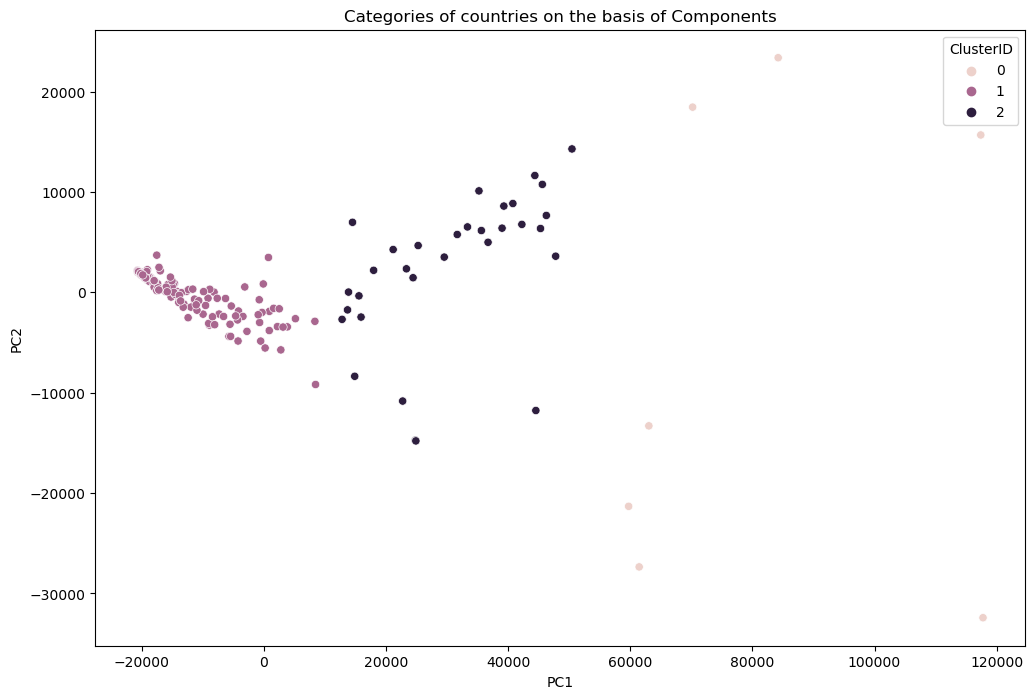

In [128]:
fig = plt.figure(figsize = (12,8))
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',legend='full',data=dat_km)

plt.title('Categories of countries on the basis of Components')
plt.show()

In [129]:
dat5=pd.merge(df,dat_km, left_index=True,right_index=True)
dat5.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,PC5,ClusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,-19815.128018,1651.124720,38.425200,-0.186982,-13.693864,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,-11338.938992,-1493.469028,-28.181547,-14.068279,-7.985477,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,-8926.352589,-3264.684102,-11.917987,-16.803336,12.221441,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,-14652.465937,867.795270,59.556608,40.487765,24.418291,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,896.142032,-1898.478151,-29.132724,0.507326,-7.641476,1


In [130]:
dat6=dat5.drop(['PC1','PC2','PC3','PC4','PC5'],axis=1)
dat6.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


In [131]:
dat6.shape

(167, 11)

Analysis of the clusters

calculating the mean of all the variables of each clusters.

In [132]:
Cluster_GDPP=pd.DataFrame(dat6.groupby(["ClusterID"]).gdpp.mean())
Cluster_child_mort=pd.DataFrame(dat6.groupby(["ClusterID"]).child_mort.mean())
Cluster_exports=pd.DataFrame(dat6.groupby(["ClusterID"]).exports.mean())
Cluster_income=pd.DataFrame(dat6.groupby(["ClusterID"]).income.mean())
Cluster_health=pd.DataFrame(dat6.groupby(["ClusterID"]).health.mean())
Cluster_imports=pd.DataFrame(dat6.groupby(["ClusterID"]).imports.mean())
Cluster_inflation=pd.DataFrame(dat6.groupby(["ClusterID"]).inflation.mean())
Cluster_life_expec=pd.DataFrame(dat6.groupby(["ClusterID"]).life_expec.mean())
Cluster_total_fer=pd.DataFrame(dat6.groupby(["ClusterID"]).total_fer.mean())

Concatenating all the grouped by data to create a new dataframe to find required mean.

In [133]:
df1 = pd.concat([Cluster_GDPP,Cluster_child_mort,Cluster_income,Cluster_exports,Cluster_health,
                Cluster_imports,Cluster_inflation,Cluster_life_expec,Cluster_total_fer], axis=1)

In [134]:
df1

,gdpp,child_mort,income,exports,health,imports,inflation,life_expec,total_fer
ClusterID,,,,,,,,,
0,65442.857143,6.228571,80342.857143,96.442857,5.712857,68.571429,6.388714,80.285714,1.767143
1,4438.390625,47.389844,8569.242188,35.865617,6.332031,45.921609,8.957648,67.873437,3.263359
2,35587.500000,8.800000,37621.875000,49.978125,8.991563,46.021875,3.383312,79.156250,1.944687


Creating a dataframe of mean of all the variables of all the clusters

In [136]:
df1.columns = ["GDPP","child_mort","income","exports","health","imports","inflation","life_expec","total_fer"]
df1

,GDPP,child_mort,income,exports,health,imports,inflation,life_expec,total_fer
ClusterID,,,,,,,,,
0,65442.857143,6.228571,80342.857143,96.442857,5.712857,68.571429,6.388714,80.285714,1.767143
1,4438.390625,47.389844,8569.242188,35.865617,6.332031,45.921609,8.957648,67.873437,3.263359
2,35587.500000,8.800000,37621.875000,49.978125,8.991563,46.021875,3.383312,79.156250,1.944687


- Analysing the clusters by comparing how the [gdpp, child_mort and income] vary for each cluster of countries to recognise and differentiate the clusters of developed countries from the clusters of under-developed countries.

- From above dataframe of means, we got the mean data of under-developed countries. So, creating a dataframe on the basis of same.

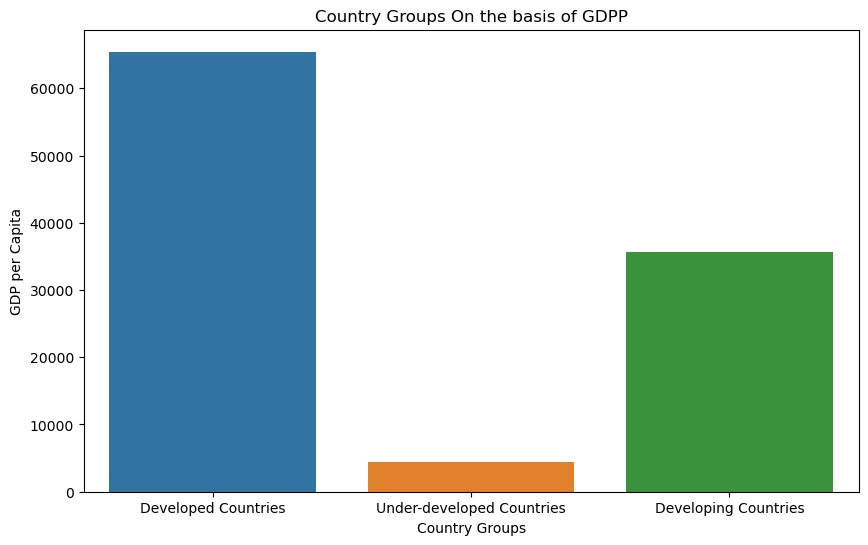

In [138]:
fig = plt.figure(figsize = (10,6))
df1.rename(index={0: 'Developed Countries'},inplace=True)
df1.rename(index={1: 'Under-developed Countries'},inplace=True)
df1.rename(index={2: 'Developing Countries'},inplace=True)
s=sns.barplot(x=df1.index,y='GDPP',data=df1)
plt.xlabel('Country Groups', fontsize=10)
plt.ylabel('GDP per Capita', fontsize=10)
plt.title('Country Groups On the basis of GDPP')
plt.show()

Similarly, Above bar chart shows that, all the developed countries are having high income per person, developing countries are having average income per person and poor countries are having the least income per person.

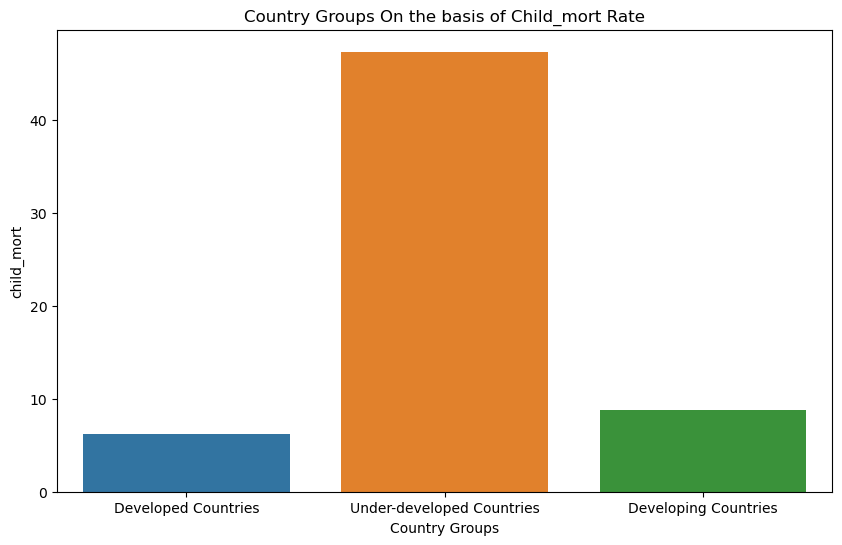

In [139]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x=df1.index,y='child_mort',data=df1)
plt.xlabel('Country Groups', fontsize=10)
plt.title('Country Groups On the basis of Child_mort Rate')
plt.show()

So, Above bar chart shows that, all the developed countries are having low number of death of children under 5 years of age per 1000 live births, developing countries are having average death rate and poor countries are having the least daeth rate.

In [140]:
#Let's use the concept of binning
fin=df[df['gdpp']<=1909]
fin=fin[fin['child_mort']>= 92]
fin=fin[fin['income']<= 3897.35]

Merging to get the cluster ids

In [142]:
fin_k=pd.merge(fin,dat_km,left_index=True,right_index=True)

In [143]:
fin_k

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,PC5,ClusterID
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,-19521.704558,1655.858612,55.056835,10.190531,-5.970572,1
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,-19930.847861,1790.762942,63.213803,3.933353,-1.733267,1
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,-20651.142870,1998.236120,42.162039,-3.567347,-9.519542,1
28,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,-18532.066416,1480.024177,56.945802,1.322530,-1.391531,1
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,-20413.388007,2069.341065,96.748111,8.910848,-8.501082,1
32,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,-19346.308348,1681.324874,88.121442,36.029623,-0.165737,1
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.800,57.5,6.54,334,-20693.038660,2179.539605,53.650032,31.802943,8.862332,1
40,Cote d'Ivoire,111.0,50.60,5.30,43.3,2690,5.390,56.3,5.27,1220,-18572.071960,1393.982921,49.758946,31.863594,8.774388,1
63,Guinea,109.0,30.30,4.93,43.2,1190,16.100,58.0,5.34,648,-20055.110872,2008.654301,51.420245,18.025657,3.367349,1
64,Guinea-Bissau,114.0,14.90,8.50,35.2,1390,2.970,55.6,5.05,547,-19979.151138,1797.894328,60.920815,4.507660,-9.780989,1


In [145]:
fin_k=fin_k.drop(['PC1','PC2','PC3','PC4','PC5'],axis=1)

In [146]:
fin_k.shape

(17, 11)

After merging, we are getting 17 under-developed countries, where gdpp, income are less but child_mort is more.

In [147]:
fin_k_GDPP=fin_k.nsmallest(8,'gdpp')
fin_k_GDPP

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,1
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334,1
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348,1
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399,1
106,Mozambique,101.0,31.50,5.21,46.2,918,7.64,54.5,5.56,419,1
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446,1
64,Guinea-Bissau,114.0,14.90,8.50,35.2,1390,2.97,55.6,5.05,547,1
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.81,57.9,5.87,575,1


Above list shows all the top low GDPP countries

In [148]:
fin_k_income=fin_k.nsmallest(8,'income')
fin_k_income

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334,1
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,1
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348,1
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446,1
106,Mozambique,101.0,31.50,5.21,46.2,918,7.64,54.5,5.56,419,1
63,Guinea,109.0,30.30,4.93,43.2,1190,16.10,58.0,5.34,648,1
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399,1
64,Guinea-Bissau,114.0,14.90,8.50,35.2,1390,2.97,55.6,5.05,547,1


Above list shows all the top low income countries.

In [149]:
fin_k_mort=fin_k.nlargest(8,'child_mort')
fin_k_mort

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662,1
132,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.20,55.0,5.20,399,1
32,Chad,150.0,36.8,4.53,43.5,1930,6.39,56.5,6.59,897,1
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446,1
97,Mali,137.0,22.8,4.98,35.1,1870,4.37,59.5,6.55,708,1
112,Niger,123.0,22.2,5.16,49.1,814,2.55,58.8,7.49,348,1
25,Burkina Faso,116.0,19.2,6.74,29.6,1430,6.81,57.9,5.87,575,1
37,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.80,57.5,6.54,334,1


Above list shows all the top high child mort countries

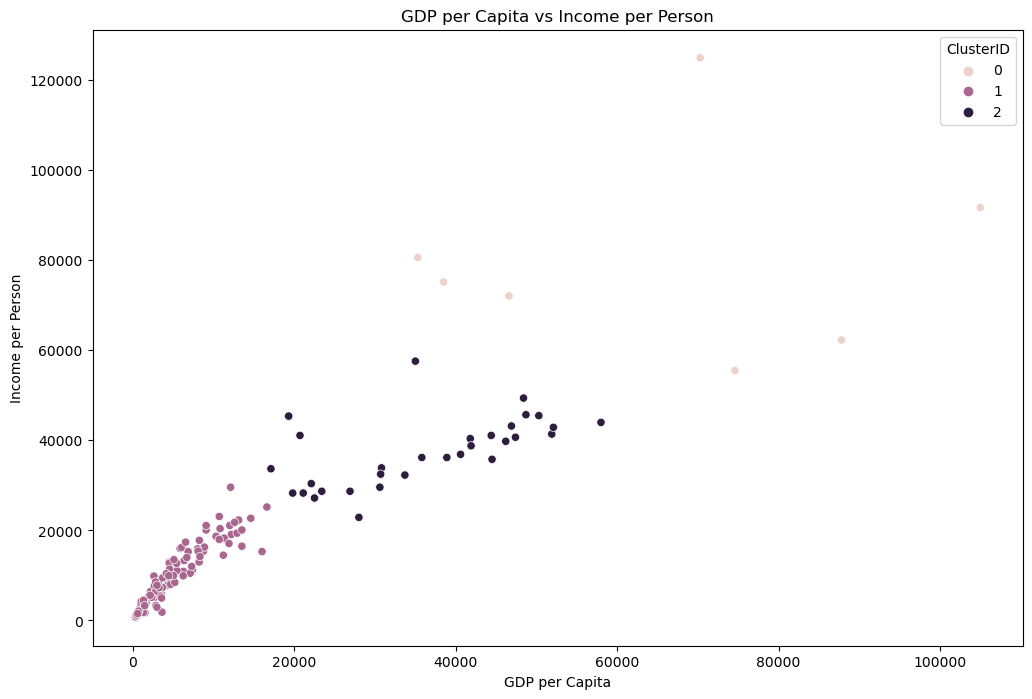

In [150]:
fig = plt.figure(figsize = (12,8))
sns.scatterplot(x='gdpp',y='income',hue='ClusterID',legend='full',data=dat6)
plt.xlabel('GDP per Capita', fontsize=10)
plt.ylabel('Income per Person', fontsize=10)
plt.title('GDP per Capita vs Income per Person')
plt.show()

From above scatter plot of gdpp and income, we can see there is some clustering like where gdpp is more, then income is also more.

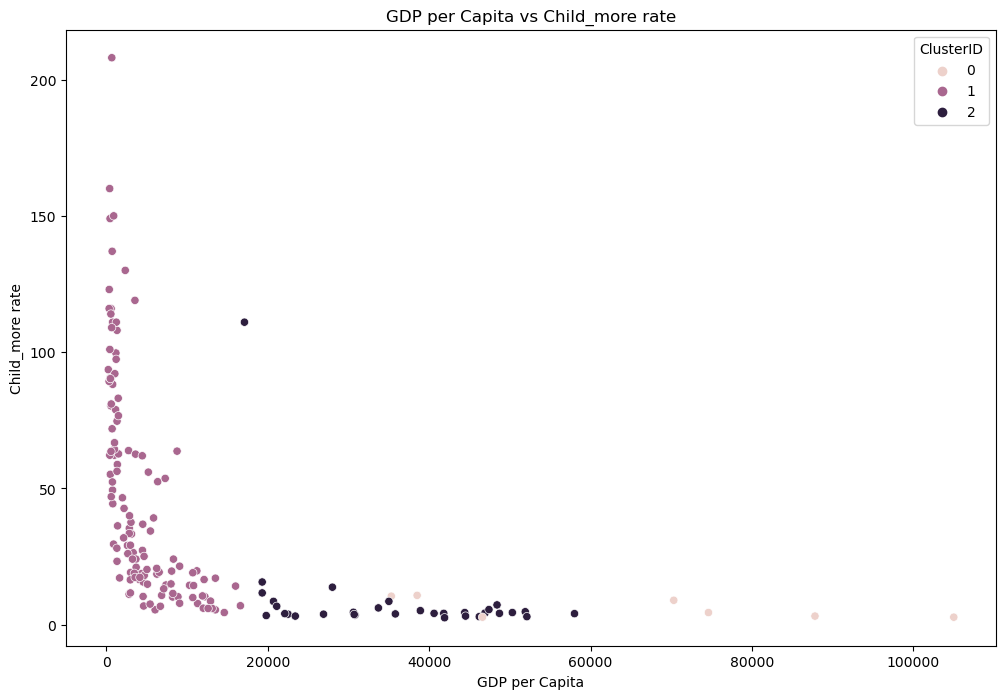

In [151]:
fig = plt.figure(figsize = (12,8))
sns.scatterplot(x='gdpp',y='child_mort',hue='ClusterID',legend='full',data=dat6)
plt.xlabel('GDP per Capita', fontsize=10)
plt.ylabel('Child_more rate', fontsize=10)
plt.title('GDP per Capita vs Child_more rate')
plt.show()

From above scatter plot of gdpp and child-mort, we can see there is some clustering where gdpp is more, there child-mort is low.

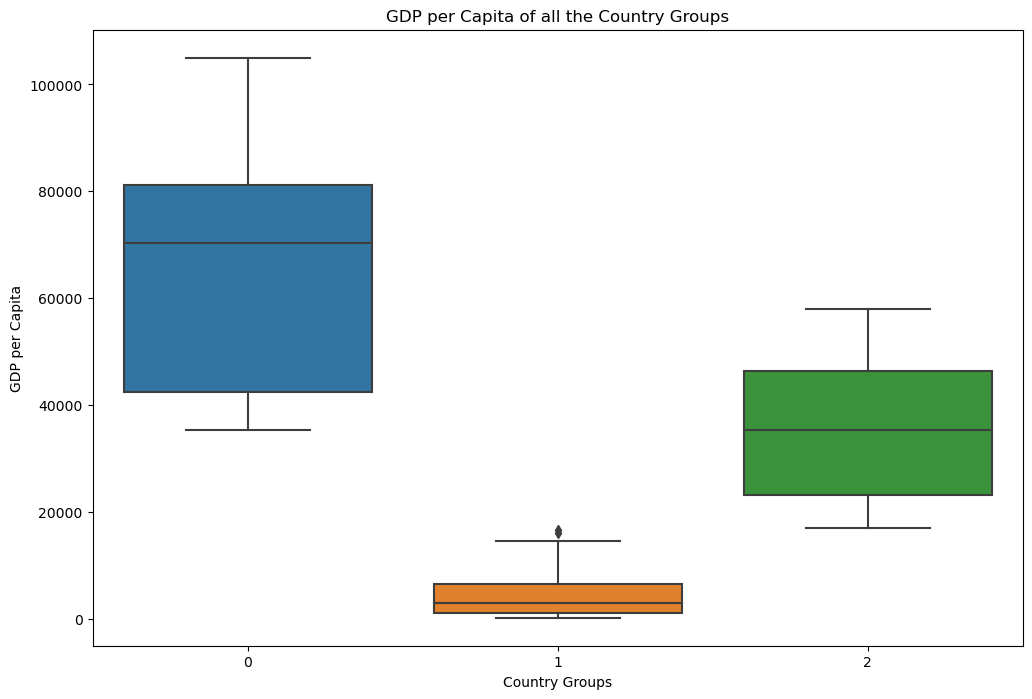

In [152]:
fig = plt.figure(figsize = (12,8))
sns.boxplot(x='ClusterID',y='gdpp',data=dat6)
plt.xlabel('Country Groups', fontsize=10)
plt.ylabel('GDP per Capita', fontsize=10)
plt.title('GDP per Capita of all the Country Groups')
plt.show()

Here, Developed countries are falling under 1st cluster because of high gdpp range. Poor countries are falling under cluster 2.

#### Performing Hirarchical Clustering

In [163]:
#To perform hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [164]:
pcs_df2.shape

(167, 5)

In [165]:
pcs_df3 = pd.DataFrame({'PC1':pc[0],'PC2':pc[1],'PC3':pc[2],'PC4':pc[3],'PC5':pc[4]})

In [166]:
dat_km.head()

,PC1,PC2,PC3,PC4,PC5,ClusterID
0,-19815.128018,1651.124720,38.425200,-0.186982,-13.693864,1
1,-11338.938992,-1493.469028,-28.181547,-14.068279,-7.985477,1
2,-8926.352589,-3264.684102,-11.917987,-16.803336,12.221441,1
3,-14652.465937,867.795270,59.556608,40.487765,24.418291,1
4,896.142032,-1898.478151,-29.132724,0.507326,-7.641476,1


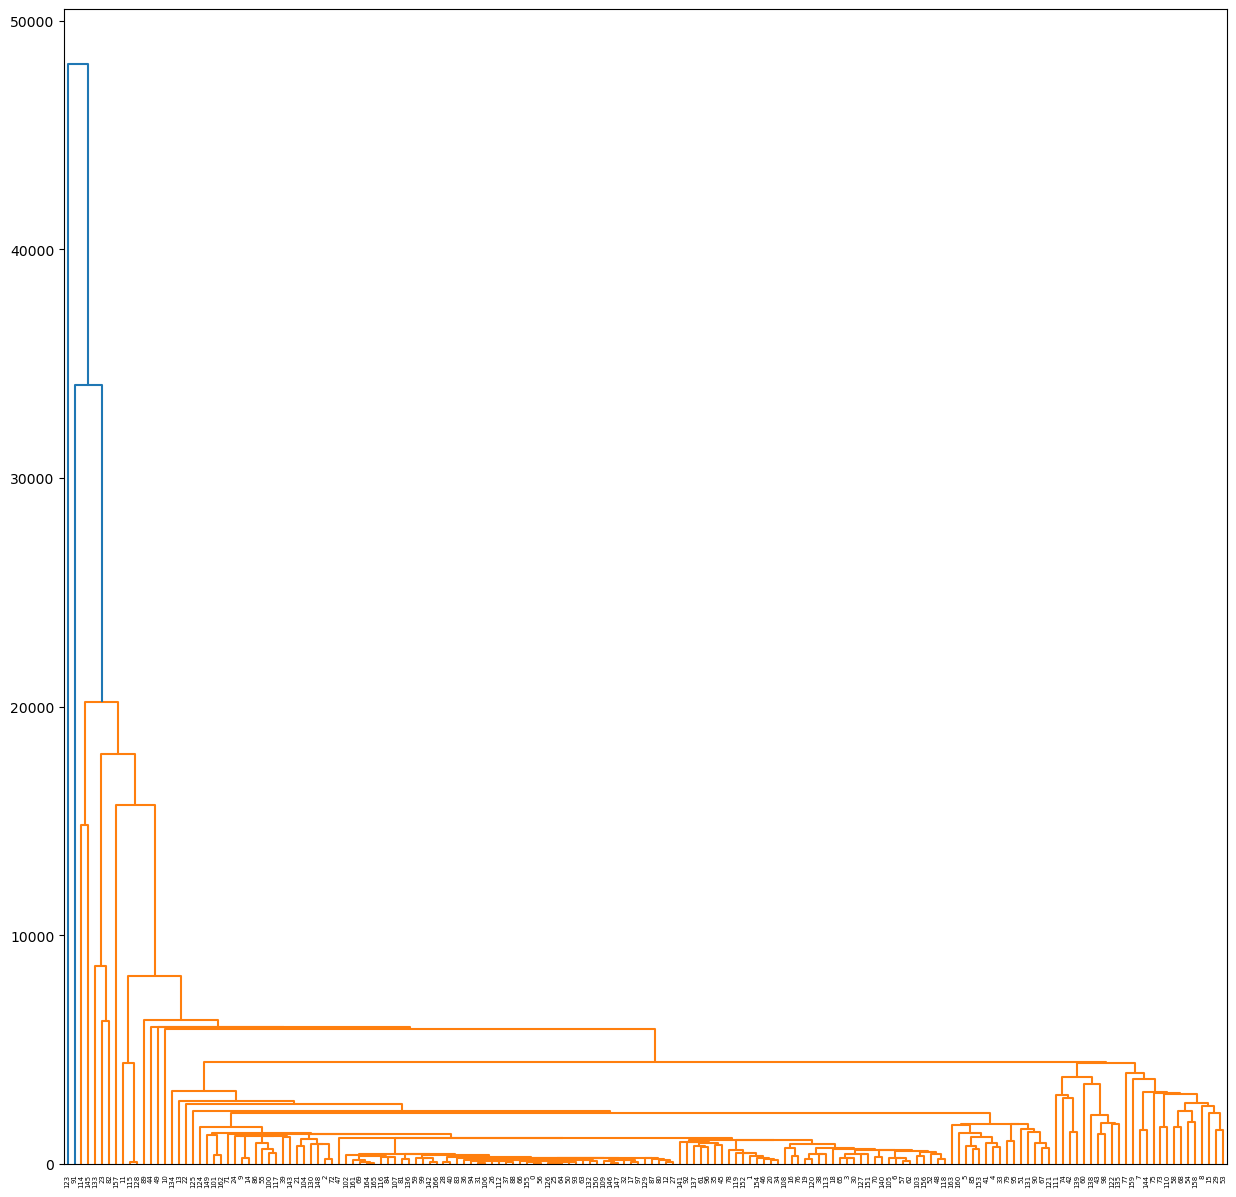

In [171]:
plt.figure(figsize=(15,15))
mergings=linkage(pcs_df2,method='single',metric='euclidean')
dendrogram(mergings)
plt.show()

Performing Complete Linkage

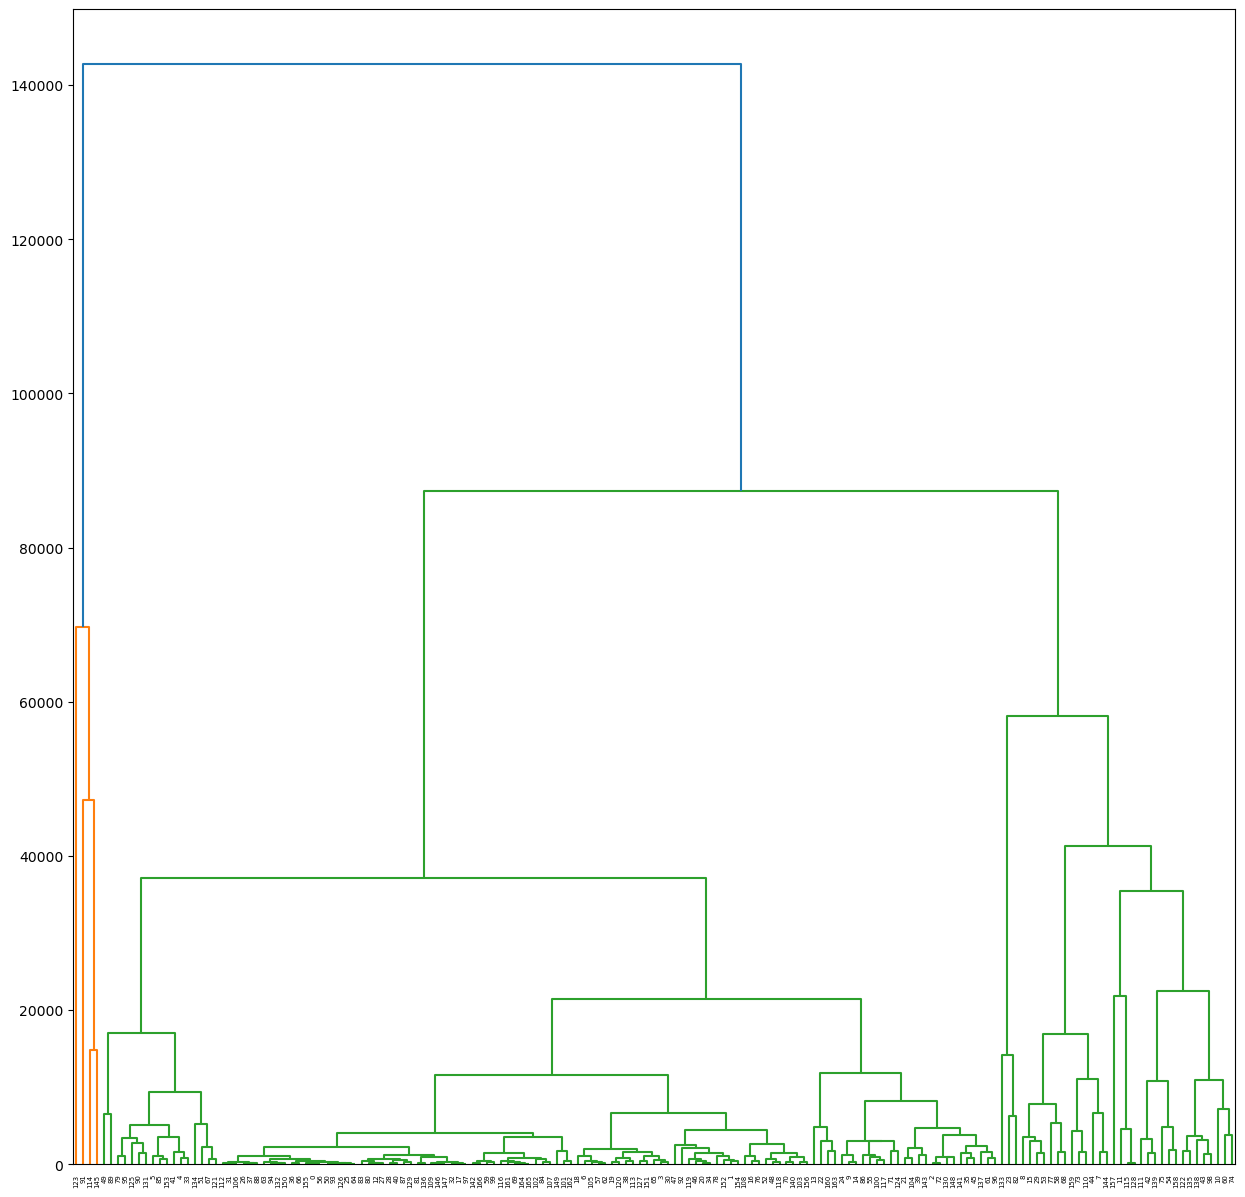

In [172]:
#mergings=linkage(fin,method='complete',metric='euclidean')
plt.figure(figsize=(15,15))
mergings=linkage(pcs_df2,method='complete',metric='euclidean')
dendrogram(mergings)
plt.show()

From above dendrograms, we can derive the 3 clusters.

In [173]:
cut_tree(mergings,n_clusters=3).shape


(167, 1)

In [175]:
cluser_labels=cut_tree(mergings,n_clusters=3).reshape(-1,)
cluser_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [176]:
#assign cluster labels
dat_km['Cluster_lables']=cluser_labels
dat_km.head()

,PC1,PC2,PC3,PC4,PC5,ClusterID,Cluster_lables
0,-19815.128018,1651.124720,38.425200,-0.186982,-13.693864,1,0
1,-11338.938992,-1493.469028,-28.181547,-14.068279,-7.985477,1,0
2,-8926.352589,-3264.684102,-11.917987,-16.803336,12.221441,1,0
3,-14652.465937,867.795270,59.556608,40.487765,24.418291,1,0
4,896.142032,-1898.478151,-29.132724,0.507326,-7.641476,1,0


In [177]:
dat7=pd.merge(Country_data,dat_km, left_index=True,right_index=True)
dat7.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,PC5,ClusterID,Cluster_lables
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,-19815.128018,1651.124720,38.425200,-0.186982,-13.693864,1,0
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,-11338.938992,-1493.469028,-28.181547,-14.068279,-7.985477,1,0
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,-8926.352589,-3264.684102,-11.917987,-16.803336,12.221441,1,0
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,-14652.465937,867.795270,59.556608,40.487765,24.418291,1,0
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,896.142032,-1898.478151,-29.132724,0.507326,-7.641476,1,0


In [178]:
dat8=dat7.drop(['PC1','PC2','PC3','PC4','PC5'],axis=1)
dat8.shape

(167, 11)

In [179]:
dat8.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID,Cluster_lables
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,0
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1,0
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1,0
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,0
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1,0


In [180]:
Cluster_GDPP_H=pd.DataFrame(dat8.groupby(["Cluster_lables"]).gdpp.mean())
Cluster_child_mort_H=pd.DataFrame(dat8.groupby(["Cluster_lables"]).child_mort.mean())
Cluster_income_H=pd.DataFrame(dat8.groupby(["Cluster_lables"]).income.mean())

In [181]:
df_H = pd.concat([Cluster_GDPP_H,Cluster_child_mort_H,Cluster_income_H], axis=1)

In [182]:
df_H.columns = ["GDPP","child_mort","income"]
df_H

,GDPP,child_mort,income
Cluster_lables,,,
0,4536.542636,47.882946,8764.054264
1,36532.352941,5.726471,41120.588235
2,84425.000000,4.875000,83625.000000


In [183]:
#Let's use the concept of binning
fin_H=df[df['gdpp']<=2330.000000]
fin_H=fin[fin['child_mort']>= 130.000000]
fin_H=fin[fin['income']<= 5150.000000]

In [184]:
fin_H=pd.merge(fin_H,dat_km,left_index=True,right_index=True)

In [185]:
fin_H=fin_H.drop(['PC1','PC2','PC3','PC4','PC5'],axis=1)
fin_H.shape

(17, 12)

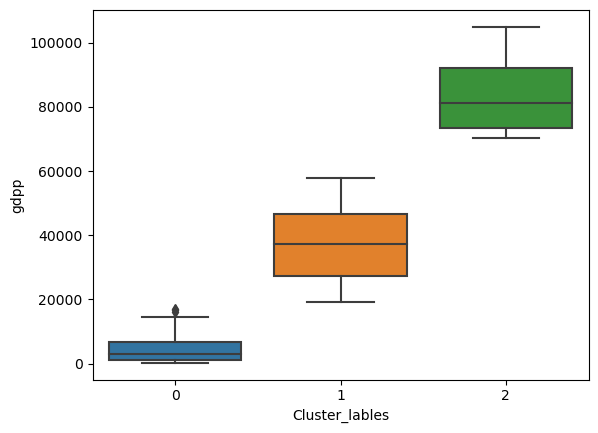

In [186]:
sns.boxplot(x='Cluster_lables',y='gdpp',data=dat8)
plt.show()

Here, Developed countries are falling under 2nd cluster because of high gdpp range. Poor countries are falling under cluster 0

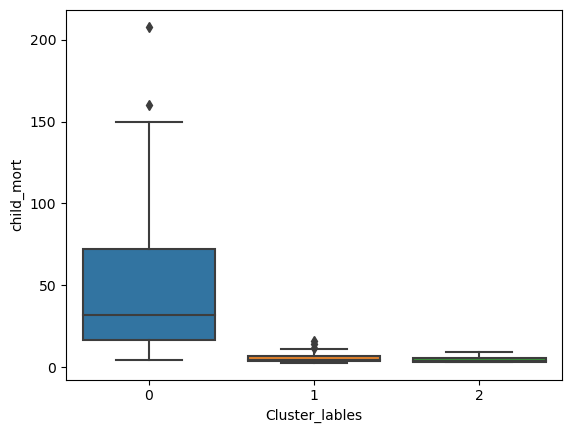

In [188]:
sns.boxplot(x='Cluster_lables',y='child_mort',data=dat8)
plt.show()

From the above plots we can see poor countries are falling under cluster 0. So, the child_mort rate is more in these countries.

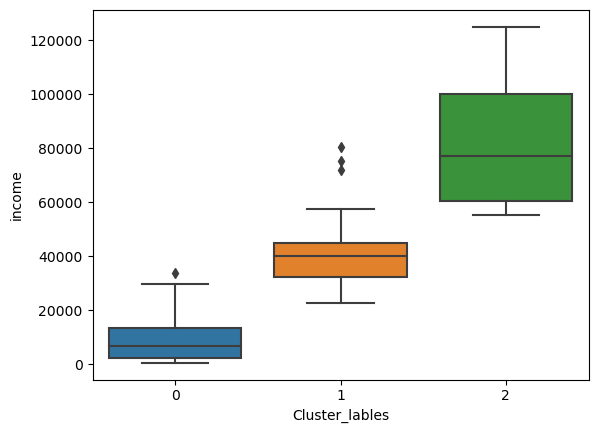

In [189]:
sns.boxplot(x='Cluster_lables',y='income',data=dat8)
plt.show()

Here, As Developed countries are falling under cluster 2, So the income is in high range

In [190]:
fin_H.nsmallest(8,'gdpp')

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID,Cluster_lables
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,1,0
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334,1,0
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348,1,0
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399,1,0
106,Mozambique,101.0,31.50,5.21,46.2,918,7.64,54.5,5.56,419,1,0
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446,1,0
64,Guinea-Bissau,114.0,14.90,8.50,35.2,1390,2.97,55.6,5.05,547,1,0
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.81,57.9,5.87,575,1,0


After comparing both K-means and Heirarchical clustering method, I am going with the K-means outcomes as the plots are clearly visible. As in both the methods, the top 8 under-developed countries are similar. I am considering the result of k-means outcome.

- Recomendations

From bar chats, we can clearly see the socio-economic and heath situation of the under developed countries.
In countries like Haiti, Sierra Leone,Chad, etc., the death rate of children under 5 years of age per 1000 (child-mort) is high.
In countries like Burundi, Congo, Niger, etc., GDP per capita is very low. So, in those countries, the income per person is also low. So, these countries are considered as poor contries.
Finally, as per categories of the countries, top 8 under-developed countries which are in direst need of aid are as below:
- Burundi
- Congo, Dem. Rep.
- Niger
- Sierra Leone
- Haiti
- Chad
- Central African Republic
- Mozambique